In [2]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt


In [10]:
folder = '../../results/'

figs = os.path.join(folder, 'figs')
file = os.path.join(folder, 'raw-results.csv')

df = pd.read_csv(file)

sns.set_context("paper", font_scale=2.6)   
sns.set_style("ticks")

In [4]:
df = df[df['Experiment'] == 'RETU']

<Figure size 432x288 with 0 Axes>

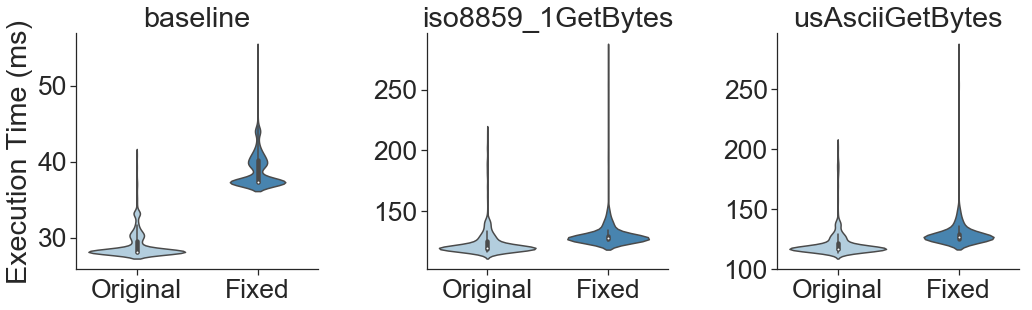

In [11]:
%matplotlib inline
plt.clf()

sns.set(font_scale=2.4)
sns.set_style("ticks")

import math

methods = ['baseline', 'iso8859_1GetBytes', 'usAsciiGetBytes']

bench = df.query('Class== "AbstractStringLayoutStringEncodingBenchmark" and Method in @methods')
#bench = bench[bench['Method'] == 'baseline']
bench = bench.replace('fixed_full', 'Fixed')
bench = bench.replace('original', 'Original')
# Execution time -> Throughput
bench['Score Norm'] = 1e6 / bench['Score']

#headers_table = pd.pivot_table(data=headers_bench, values='Score', index=['Version','Method', 'Iteration', 'Fork', 'Trial'])
cat = sns.catplot(data=bench, x='Version', y='Score Norm', col='Method',
                  ci=95, kind='violin', sharey=False, legend_out=False, legend=True, aspect=1, palette="Blues")
cat.set_axis_labels("", "Execution Time (ms)")
cat.set_titles("{col_name}")

#@cat.set_xticklabels(['i' + str(i) for i in list(range(1,21))])
#cat.set_title("{col_name}")

#plt.legend(bbox_to_anchor=(-2.3, .95), loc=2, borderaxespad=0.)

#plt.show()
#plt.xticks(fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(figs, 'log4j2-abstractstringlayoutstringencoding.pdf'))



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


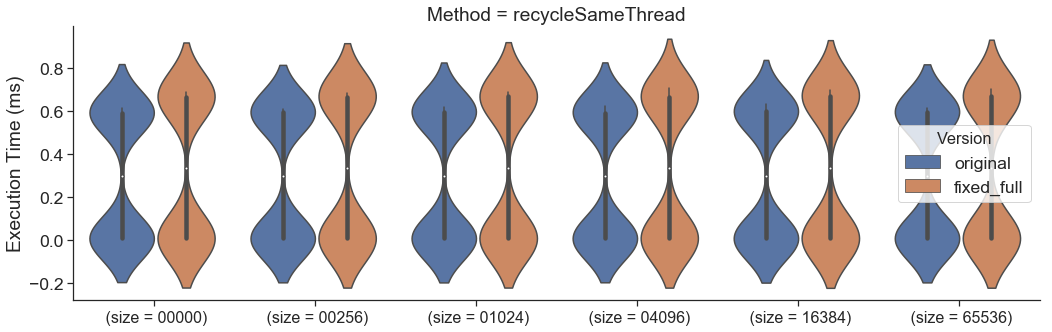

In [41]:
%matplotlib inline
plt.clf()

sns.set_style("ticks")

import math

bench = df[df['Class'] == 'RecyclableArrayListBenchmark']
#bench = bench[bench['Method'] == 'baseline']

# Execution time -> Throughput
bench['Score Norm'] = 1e6 / bench['Score']

#headers_table = pd.pivot_table(data=headers_bench, values='Score', index=['Version','Method', 'Iteration', 'Fork', 'Trial'])
cat = sns.catplot(data=bench, x='Full params', y='Score Norm', col='Method', hue='Version',
                  ci=95, kind='violin', sharey=False, legend_out=False, legend=True, aspect=3)
cat.set_axis_labels("", "Execution Time (ms)")

#@cat.set_xticklabels(['i' + str(i) for i in list(range(1,21))])
#cat.set_title("{col_name}")

#plt.legend(bbox_to_anchor=(-2.3, .95), loc=2, borderaxespad=0.)

#plt.show()
plt.xticks(fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(figs, 'netty-recyclablearraylist.pdf'))